<a href="https://colab.research.google.com/github/vortexash/Tensorflow-Developer/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

Ther are many defination for regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter.. predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating data to view and fit

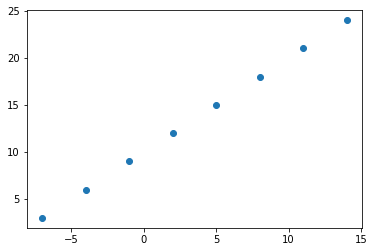

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X= np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0 ,14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output Shape

In [4]:
# Create a demo tensor for our housing price prediction problem.
house_info =tf.constant(["bedroom","bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0].ndim

0

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

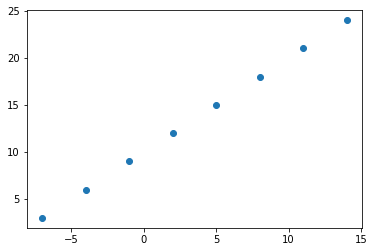

In [10]:
plt.scatter(X,y)

## Steps in modelling with Tensorflow

1. **Creating  a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong ir is) and the optimizer (tells our model how to improve the patterbs its learning) and evaluation metrics ( what we can use to interpret the performance of our model).

3. **Fitting a model** - letting the model try to find patterns between X & y(Features labels)

In [11]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
model.fit(X, y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 534ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving our model performance

We can improve our model , by aaltering the steps we took to create a model.

1.**Creating a model** - here we might ass more layers, to increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2.**Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3.**Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more example to learn form)

In [14]:
# Let's rebuild our model

# 1. Create the moddel
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
                             ])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

#3. Fitting our model (This time we will train for longer)
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 265ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 4m

In [15]:
# Remind ourself of the data
X, y 


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if our model's  performance has improved..
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [17]:
# Let's see if we  can make another to improve our model
# 1. Create the moddel
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(50 , activation=None),
    tf.keras.layers.Dense(1)
    ])
# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['mae'])

#3. Fitting our model (This time we will train for longer)
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 358ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss:

In [18]:
# Let's see if our model's  performance has improved..
model.predict([17.0])

array([[26.58353]], dtype=float32)

## Evaluating a Model

In practice, a typical workflow you'll go through when building neural networks is:

```

Build a modle -> fit it -> evaluate it -> tweak a model -> fit it-> evaluate i -> tweak a model -> fit it -> evaluate it........

```

# When it comes to evaluation... there are 3 words we should memorize:
> "Visualize, visualize, Visualize"

It's a good idea to visualize:
* The data - What data are working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - jow does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the grounfd truth (the original labels)?

In [19]:
# make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

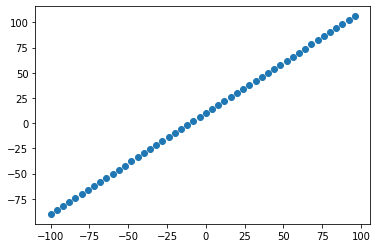

In [21]:
# Visualize the data 
import matplotlib.pyplot as plt
plt.scatter(X, y)

## The 3 sets..

* **Training set** - the model learns fro this data, which is typically 70-80% of the total data we have available.
* **Vaidation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.


In [22]:
# Check the length of how many samples we have
len(X)

50

In [44]:
# Split the data into train and test set
X_train = X[:40] # first 40 are training samples( 80% of the data) 
y_train = y[:40]
X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we ahve got our data in training and test sets... let's visualize it again!

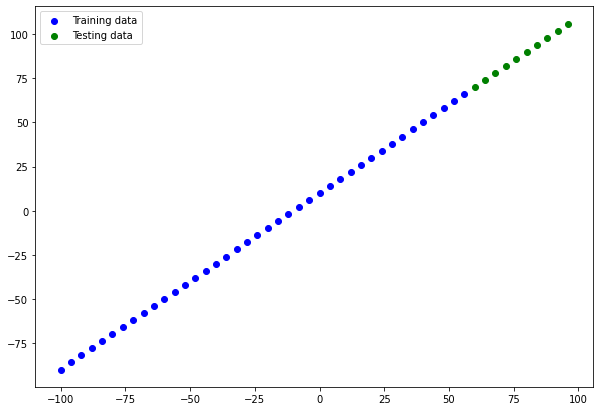

In [45]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label = "Testing data")

# Show a legend
plt.legend();

In [33]:
 # Lets's have a look at how to build a neural network for our data
 # 1. Create the moddel
# model = tf.keras.Sequential([
#                              tf.keras.layers.Dense(1)
#                              ])
# # 2. Compile the model
# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

#3. Fitting our model (This time we will train for longer)
# model.fit(X,y, epochs=100)

## Visualizing the model

In [101]:
# let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model  (same as above)
model1= tf.keras.Sequential([ 
       tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
       tf.keras.layers.Dense(1 , name="Output_layer")
       ])
#2. Compile the model(same as above)
model1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

In [102]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when we bring in already learn patterns or parameters from other models during transfer learning)


**Resource:** For more in-depth overview of the trainable parameters within a layer, check out MIT's Introduction to deep learninig videos [here](https://www.youtube.com/watch?v=5tvmMX8r_OM)

**Exercise:** Tery playing arounf with number of hidden units in the dense layer, see how that effects the number of parameters(total and trainable) by calling `**model.summary()**`.

In [103]:
# # Create a model  (same as above)
# model= tf.keras.Sequential([tf.keras.layers.Dense(30, input_shape=[1])
# ])

# #2. Compile the model(same as above)
# model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

In [104]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Obsevation:** We can see that as we increase the hidden unit the `total params` and `trainable params` **doubled** the number of hidden units

In [105]:
# Lets fit our model to the training data
model1.fit(X_train,y_train, epochs=100, verbose=0)

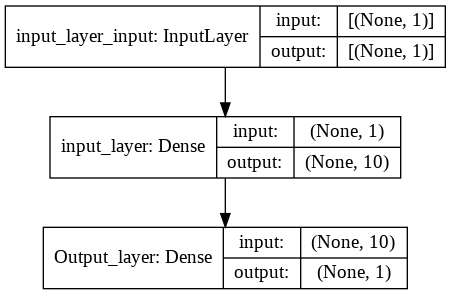

In [106]:
## Plotting our model
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

##Visualizing our model's predicting

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often we'll see this in the form of `y_test` or `y_truth` versus `y_pred `(ground truth versus our model's predictions) 

In [107]:
# make some predictions
y_pred = model1.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [108]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If we feel like we are going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [109]:
# Let's create a plotting function 
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label = "Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label = "Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label = "Predictions")
    # Show a legend
    plt.legend();


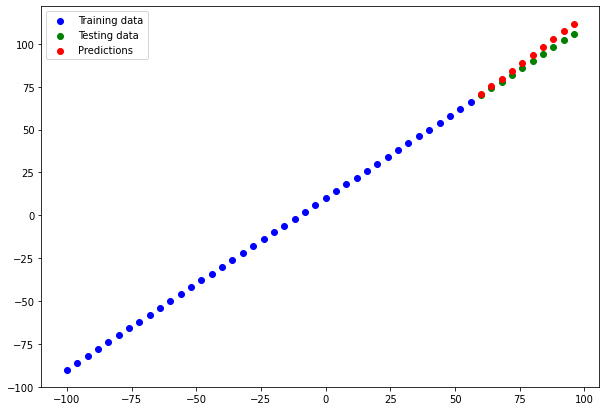

In [110]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evaluating our model's with Regression Evaluation metrics

Depending on the problem we are working on, there will be different evaluation metrics to evaluate your model's performace.
Since we are working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors" 

In [113]:
# Evaluate the model on the test
model1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 83ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [116]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test,tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [117]:
 # Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [119]:
 # Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [130]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))


def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

## Runninf experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```
1. Get more data - get more examples for our model to train on (more opportunir=ties to learn patterns or relationships between features and labels).

2. Makke our model larger (using more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give our model more of a chance to find patterns in the data.

 Let's do 3 modelling experiments:
 1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
 2. `model_2` - 2 layers, trained for 100 epochs
 3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**



In [124]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(1)                              
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.optimizers.SGD(),
                metrics=['mae'])
#3. Fit our model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - l

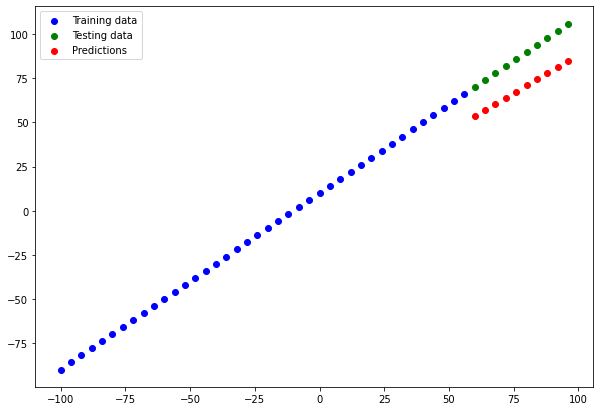

In [127]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions = y_pred_1)


In [131]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 =mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `Model_2`**
- 2 dense layers,trained for 100 epochs

In [134]:
# set the random seed
tf.random.set_seed(42)

# Create model_2
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,input_shape=[1]),
  tf.keras.layers.Dense(1)      
])

# Compile the model
model_2.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 22.4660 - mae: 22.4660
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 22.1294 - mae: 22.1294
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 27.5095 - mae: 27.5095
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 13.5509 - mae: 13.5509
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 18.2156 - mae: 18.2156
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.2239 - mae: 9.2239
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1858 - mae: 10.1858
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1702 - mae: 11.1702
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 41.4637 - mae: 41.4637
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 28.7305 - mae: 28.7305
Epoch 11/100
2/2 [==============================] - 0s 7ms/st

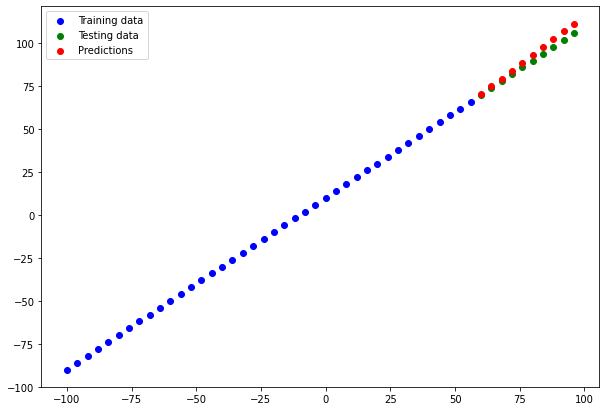

In [135]:
# Make and plot predictions for model_1
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions = y_pred_2)


In [136]:
# Calculate model_1 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 =mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9403756>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.373231>)

**Build `model_3`**
- 2 layer with 500 epochs

In [137]:
# set the random seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,input_shape=[1]),
  tf.keras.layers.Dense(1)      
])

# Compile the model
model_3.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 22.4660 - mae: 22.4660
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 22.1294 - mae: 22.1294
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 27.5095 - mae: 27.5095
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 13.5509 - mae: 13.5509
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 18.2156 - mae: 18.2156
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 9.2239 - mae: 9.2239
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 10.1858 - mae: 10.1858
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 11.1702 - mae: 11.1702
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 41.4637 - mae: 41.4637
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 28.7305 - mae: 28.7305
Epoch 11/500
2/2 [==============================] - 0s 6ms/st

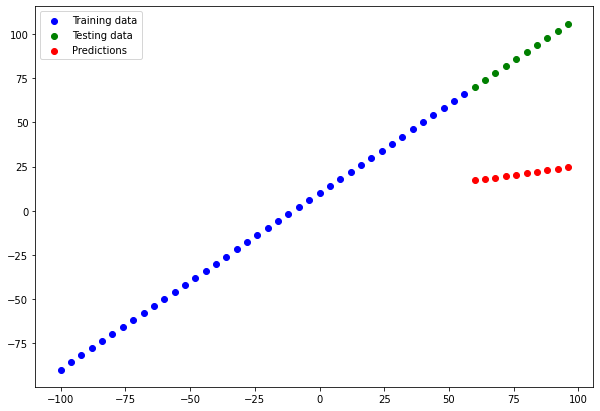

In [138]:
# Make and plot predictions for model_1
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions = y_pred_3)

In [139]:
# Calculate model_1 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 =mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.11937>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4587.4634>)

**Note:** We want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

we've run a few experiments, let's compare the results.

In [143]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results , columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,2.940376,11.373231
2,model_3,67.119370,4587.463379


**Observations:** looks like `model_2` performed the best.

In [144]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


**Note:** One of our main goals should be to minimize the time between our experiments. The more experiments we do , the more thing we will figure it out, which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's moto: "Experiment , experiment, experiment"

## Tracking your experiments
one really good habit in machine learning experiments is to track the results of our experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckly, ther are tools to help us!

**Resource:** As we build more models, we'll want to look in using:

* TensorBoard - a component of the Tensorflow library to help track modelling experiments (we'll see this one later)

* Weights & Biases - atool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)